[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/astrobatty/eleonor_photometry/blob/master/eleonor_photometry.ipynb)

# Install packages

In [2]:
!pip install imgaug==0.2.5
!pip install git+https://github.com/astropy/photutils.git
!pip install eleanor

     |████████████████████████████████| 563kB 4.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=494ad4f3c3198f7575c2c5dcf44010b3bfd2c62d9627741921b383ba005a14ab
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Cloning https://github.com/astropy/photutils.git to /tmp/pip-req-build-28xnkr0y
  Running command git clone -q https://github.com/astropy/photutils.git /tmp/pip-req-build-28xnkr0y
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3MB 4.9MB/s 
  Created wheel for photutils: filename=photutils-0.8.dev3936-cp36-cp36m-l

# Import packages

In [0]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Extract photometry from one specific TESS sector

In [2]:
# Get data
star = eleanor.Source(tic=38846515, sector=6, tc=True)

/usr/local/lib/python3.6/dist-packages/eleanor/source.py:396: UserWarning: Warning: unable to create .. Downloading TessCut to the current working directory instead.
  'working directory instead.'.format(download_dir))


Inflating...


In [0]:
# Do PSF photometry
data = eleanor.TargetData(star, height=11, width=11, bkg_size=31, do_psf=True, do_pca=True)

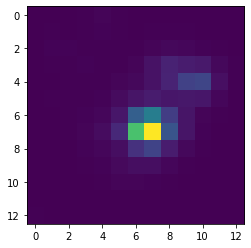

In [4]:
# Plot TPF
plt.imshow(data.tpf[0])
plt.show()

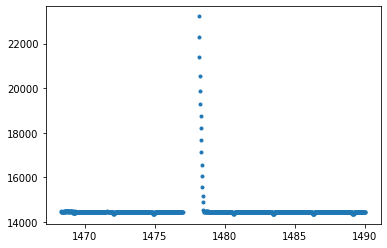

In [5]:
# Plot light curve
q = data.quality == 0
plt.plot(data.time[q], data.psf_flux[q], '.')
#plt.ylim(14300,14600)
plt.show()

In [0]:
# Save light curve to ASCII file
np.savetxt('lc.txt', np.c_[data.time[q], data.psf_flux[q], data.flux_err[q]] )

# Extract photometry from all available TESS sectors

In [0]:
# Get data from all sectors
star = eleanor.multi_sectors(tic=307210830, sectors='all', tc=True)

Found star in Sector(s) 2 5 8 9 10 11 12


In [0]:
# Plot and save light curve
plt.figure(figsize=(15,5))
for i in range(len(star)):
    print(i)
    data0 = eleanor.TargetData(star[i], height=11, width=11, bkg_size=31, do_psf=True, do_pca=True)

    q0 = data0.quality == 0

    plt.plot(data0.time[q0], data0.psf_flux[q0]/np.median(data0.psf_flux[q0]), 'k.')
    
    np.savetxt('lc_%d.txt' % i, np.c_[data0.time[q0], data0.psf_flux[q0], data0.flux_err[q0]] )

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ylim(0.995, 1.002)

plt.show()